# ASTR:1771 Orbital Mechanics

### Python Notes

Note that in python a `quantity` object represents a number with some associated unit. To learn more about `quantity` object, check out [this page](https://docs.astropy.org/en/stable/units/quantity.html#plotting-quantities).

Useful links:
- [astropy units](https://docs.astropy.org/en/stable/units/standard_units.html)
- [astropy constants](https://docs.astropy.org/en/stable/constants/index.html)
- [numpy math functions](https://numpy.org/doc/stable/reference/routines.math.html)

### Define a function to calculate velocity with the vis-viva equation

In [2]:
# load essential modules - numpy for scientific calculation and astropy's constants
import numpy as np
import astropy.constants as const
import astropy.units as u
import matplotlib.pyplot as plt

# function to calculate velocity using vis-viva equation
def v(M,d,a):
    # M - mass of central object, d - distance to M, a - semimajor axis 
    # all input parameters should be quantities ()
    v2 = const.G * M * (2./d - 1./a)
    return np.sqrt(v2)

# example: calculate circular velocity at 1AU from Sun
v_circ = v(const.M_sun, const.au, const.au) 
print(v_circ)

# example: calculate perihelion velocity at 1AU for Hohmann transfer orbit to Mars
v_peri = v(const.M_sun, const.au, 1.26 * const.au) 
print(v_peri)

# calculate delta v
dv = v_peri - v_circ
print(dv)

29784.69182967693 m / s
32713.697417974192 m / s
2929.005588297263 m / s


In [3]:
print(const.M_sun)

  Name   = Solar mass
  Value  = 1.988409870698051e+30
  Uncertainty  = 4.468805426856864e+25
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018


### Define a function to calculate mass ratio using the Rocket equation.

In [4]:
# function to calculate mass ratio m_i/m_f using rocket equation
def mi_mf(delta_v,v_e):
    # both input velocities should be either numbers or quantities
    return np.exp(delta_v/v_e)

# example: calculate initial mass required to launch 150 kg of payload to the transfer orbit above
mf = 150.0 * u.kg # this is how to create a quantity object
ve = 3e3 * u.m/u.s 
mi = mf * mi_mf(dv,ve)
print('initial mass = ',mi)

initial mass =  398.2064105002813 kg


### Generate a plot of circular velocity vs. heliocentric distance

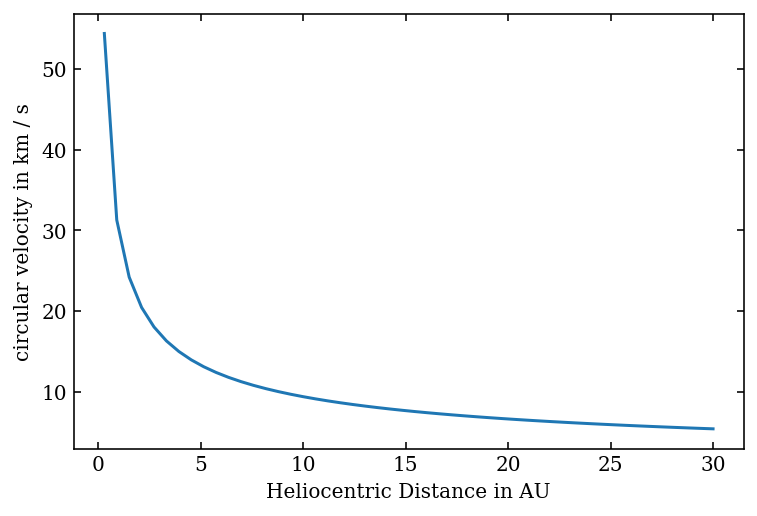

In [5]:
# heliocentric distances
d = np.linspace(0.3,30) * u.au 
# calculate circular velocities
v_c = v(const.M_sun,d,d)
# convert unit to km/s
v_c = v_c.to(u.km/u.s)

plt.plot(d,v_c)
plt.xlabel('Heliocentric Distance in '+str(d.unit))
plt.ylabel('circular velocity in '+str(v_c.unit));